In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('final_dataset.csv')
df.head()




Saving final_dataset.csv to final_dataset (1).csv


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [ ]:
import os
os.getcwd()
print("Null values in each column:")
print(df.isnull().sum())


Null values in each column:
Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64


In [ ]:
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [ ]:
df.tail()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
1456,27,12,2024,0,5,58.43,249.17,41.69,65.89,0.99,36.25,263
1457,28,12,2024,0,6,33.83,150.77,33.31,66.14,0.79,35.19,113
1458,29,12,2024,1,7,31.21,139.75,27.01,65.94,0.57,35.88,142
1459,30,12,2024,0,1,38.01,152.83,29.12,65.16,0.55,38.38,116
1460,31,12,2024,0,2,80.42,318.96,40.37,64.98,0.84,39.93,209


In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"
    else:
        return "Post-Monsoon"

df["Season"] = df["Month"].apply(get_season)
df[["Month", "Season"]].head(15)



,Month,Season
0,1,Winter
1,1,Winter
2,1,Winter
3,1,Winter
4,1,Winter
5,1,Winter
6,1,Winter
7,1,Winter
8,1,Winter
9,1,Winter


In [ ]:
def get_aqi_category(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 200:
        return "Poor"
    elif aqi <= 300:
        return "Very Poor"
    elif aqi <= 400:
        return "Severe"
    else:
        return "Hazardous"

df["AQI_Category"] = df["AQI"].apply(get_aqi_category)
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,Season,AQI_Category
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,Winter,Hazardous
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,Winter,Hazardous
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,Winter,Very Poor
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207,Winter,Very Poor
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149,Winter,Poor


In [ ]:
df.columns
# Should show something like: ['Year', 'Month', 'Day', ...]




Index(['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10',
       'NO2', 'SO2', 'CO', 'Ozone', 'AQI'],
      dtype='object')

In [ ]:
# Rename your day column from 'Date' → 'Day'
df = df.rename(columns={'Date': 'Day'})

# Now create FullDate
df['FullDate'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Check result
df[['Year', 'Month', 'Day', 'FullDate']].head()


,Year,Month,Day,FullDate
0,2021,1,1,2021-01-01
1,2021,1,2,2021-01-02
2,2021,1,3,2021-01-03
3,2021,1,4,2021-01-04
4,2021,1,5,2021-01-05


In [ ]:
df.head()

,Day,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,FullDate
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05


In [ ]:
df['Weekday'] = df['FullDate'].dt.strftime('%a')
df.head()


,Day,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,FullDate,Weekday
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01,Fri
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02,Sat
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03,Sun
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04,Mon
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05,Tue


In [ ]:
df.head()

,Day,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,FullDate,Weekday
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01,Fri
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02,Sat
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03,Sun
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04,Mon
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05,Tue


In [ ]:
df['DayType'] = df['Holidays_Count'].apply(lambda x: 'Holiday' if x==1 else 'Working Day')
df.head()


,Day,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,FullDate,Weekday,DayType
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01,Fri,Working Day
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02,Sat,Working Day
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03,Sun,Holiday
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04,Mon,Working Day
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05,Tue,Working Day


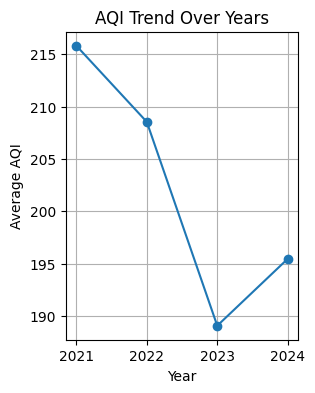

In [ ]:
yearly = df.groupby('Year')['AQI'].mean()

plt.figure(figsize=(3,4))
plt.plot(yearly, marker='o')
plt.title("AQI Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.grid(True)
plt.show()

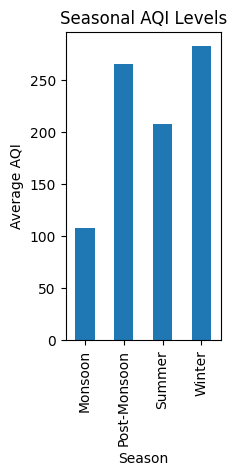

In [ ]:
seasonal = df.groupby('Season')['AQI'].mean()
plt.figure(figsize=(2,4))
seasonal.plot(kind='bar')
plt.title("Seasonal AQI Levels")
plt.ylabel("Average AQI")
plt.show()

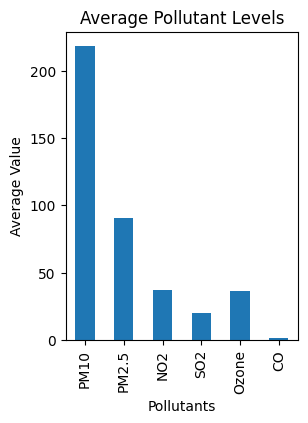

In [ ]:
pollutants = ['PM10', 'PM2.5', 'NO2', 'SO2', 'Ozone', 'CO']
pollutant_avg = df[pollutants].mean()
plt.figure(figsize=(3,4))
pollutant_avg.plot(kind='bar')
plt.title("Average Pollutant Levels")
plt.xlabel("Pollutants")
plt.ylabel("Average Value")
plt.show()

In [ ]:
print(df.columns)


Index(['Day', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10',
       'NO2', 'SO2', 'CO', 'Ozone', 'AQI', 'Season', 'AQI_Category',
       'FullDate', 'Weekday', 'DayType'],
      dtype='object')


In [ ]:
weekday_avg = df.groupby('Weekday')['AQI'].mean().sort_values(ascending=False)
print(weekday_avg)




Weekday
Tue    204.440191
Fri    203.870813
Wed    203.504808
Thu    203.250000
Sun    201.665072
Sat    200.593301
Mon    198.162679
Name: AQI, dtype: float64


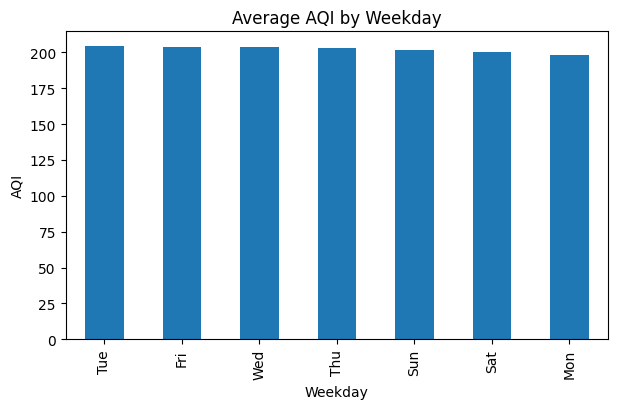

In [ ]:
weekday_avg.plot(kind='bar', figsize=(7,4))
plt.title("Average AQI by Weekday")
plt.ylabel("AQI")
plt.show()


In [ ]:
df.head()

,Day,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,FullDate,Weekday,DayType
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01,Fri,Working Day
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02,Sat,Working Day
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03,Sun,Holiday
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04,Mon,Working Day
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05,Tue,Working Day


In [ ]:
print(df.columns)


Index(['Day', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10',
       'NO2', 'SO2', 'CO', 'Ozone', 'AQI', 'FullDate', 'Weekday', 'DayType'],
      dtype='object')


In [ ]:
heatmap_data = df.pivot_table(
    values='AQI',
    index='Weekday',
    columns='Month',
    aggfunc='mean'
)


In [ ]:
# full avg per weekday
weekday_avg = df.groupby('Weekday')['AQI'].mean()

# add as a new column
heatmap_data['Total_Avg'] = weekday_avg


In [ ]:
order = ['Tue', 'Fri', 'Wed', 'Thu', 'Sun', 'Sat', 'Mon']
heatmap_data = heatmap_data.reindex(order)


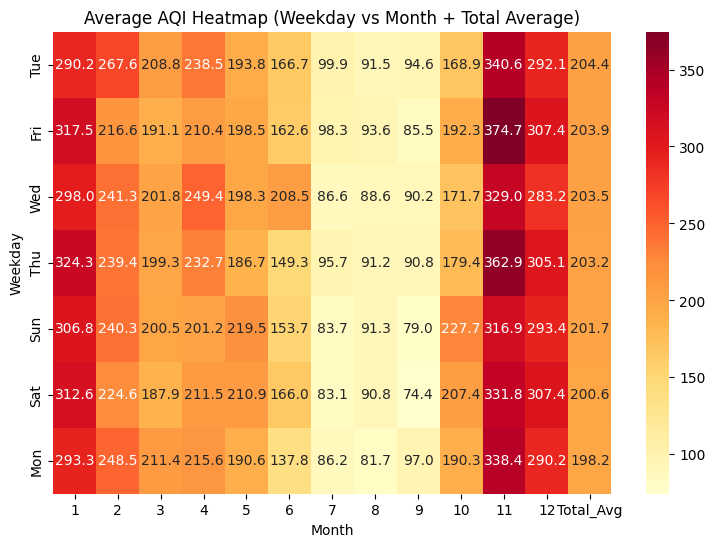

In [ ]:
plt.figure(figsize=(9,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Average AQI Heatmap (Weekday vs Month + Total Average)")
plt.xlabel("Month")
plt.ylabel("Weekday")
plt.show()
